In [2]:
#numpy 실행코드
import numpy as np

In [3]:
#matplotlib(히스토그램) 실행코드
import matplotlib.pyplot as plt

In [4]:
class Stock:
    def __init__(self, expected_return, volatility, current_price):
        self.expected_return = expected_return #기대수익률
        self.volatility = volatility #변동성
        self.current_price = current_price #현재 주가
    
    #T년 후의 주가 예측 함수
    def future_price(self, T, seed, size=1):#future_price : 미래 주가
        np.random.seed(seed)
        z = np.random.normal(size=size) #9~10번줄은 표본정규분포를 이용하기 위해서 함 
        future_prices = self.current_price * np.exp((self.expected_return - 0.5*self.volatility**2)*T +self.volatility *np.sqrt(T)*z)
        #11번 줄 : 과제에 주어진 식 그대로 이용하여 미래 주가 계산 
        return future_prices
    
    #표본평균, 표본분산 리턴 함수
    def sample_E_and_var(self, T, seed, n):
        future_price = self.future_price(T,seed,size=n)
        sample_mean = np.mean(future_price) #넘파이를 이용하여 표본 평균 계산
        sample_variance = np.var(future_price) #넘파이를 이용하여 표본 분산 계산  
        return  sample_mean, sample_variance
    
    #이론상 표본평균, 표본분산 리턴 함수
    def real_E_and_var(self, T, seed, n):
        real_mean = self.current_price * np.exp(self.expected_return*T) #주어진 식 그대로 이용하여 이론상 표본 평균 계산
        real_var = (self.current_price**2) * np.exp(2*self.expected_return*T)*(np.exp(self.volatility**2*T)-1) 
        #24~25번 줄 : 주어진 식 그대로 이용하여 이론상 표본 평균과 표본 분산 계산 
        return real_mean, real_var
    
    #배당수익률 계산 함수
    def calculate_dividend_yield(self, dividend): #dividend : 배당금 
        return dividend / self.current_price #배당수익률 : 배당금/현재주가
    
    #주가 그래프 함수
    def future_price_graph(self,T,seed,n):
        future_prices = self.future_price(T, seed, size=n)
        x=np.arange(1,n+1) #x축은 사이즈, 사이즈 값 하나에 대응하는 미래주가 값 사용.
        y=future_prices #y축을 미래주가 함수로 함
        plt.plot(x,y) #x,y 축을 이용한 그래프
        plt.xlabel('size') #x축의 이름을 size로 함
        plt.ylabel('Future price') #y축의 이름을 future price(미래주가)로 함
        plt.title('Histogram of Future Prices') #미래 주가 그래프를 그래프의 제목으로 함
        plt.show() #히스토그램(그래프) 출력
    
    #per 계산 함수
    def calculate_per(self, earnings): #earnings : 주당순이익
        return self.current_price / earnings #per : 현재주가/주당순이익

미래주가: [1227.20907469 1320.27378318 1755.09295456 3632.97734353 1656.76100178
 1881.14664151 1353.1396546  2049.07359249 1579.62178415 2863.67975416]
표본 평균: 1931.8975584642335 표본 분산: 521488.4800781861
표본 평균: 2853.237452071151 표본 분산: 5902620.666715894
표본 평균: 2720.5046893287054 표본 분산: 3882278.1208055
이론상 표본 평균: 2718.2818284590453 이론상 표본 분산: 4199290.620292738
배당수익률: 0.005
PER값: 10.0


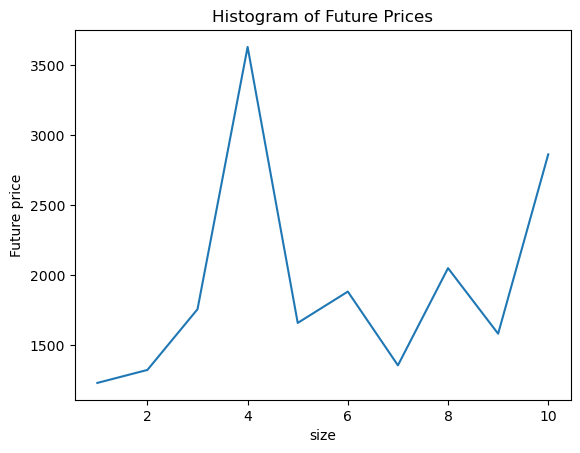

In [10]:
expected_return = 0.2 #기대수익률 값 고정
volatility = 0.3 #변동성 값 고정
current_price = 1000 #현재 주가 값 고정

stock = Stock(expected_return, volatility, current_price) #편리하게 이용할 수 있도록 stock 따로 고정
future_prices = stock.future_price(5,seed = 78965,size = 10) #미래 주가를 구하는 함수를 이용하여 미래 주가 값을 고정
print("미래주가:",future_prices) #미래주가 값 출력

sample_mean, sample_variance = stock.sample_E_and_var(T=5,seed=78965,n=10) #표본 평균, 표본 분산 구하는 함수를 이용하여 고정
print("표본 평균:",sample_mean, "표본 분산:", sample_variance) #표본 평균, 표본 분산 출력

sample_mean, sample_variance = stock.sample_E_and_var(T=5,seed=78965,n=100) #size(=n) 의 값을 100으로 늘렸을 때
print("표본 평균:",sample_mean, "표본 분산:", sample_variance)#표본 평균, 표본 분산 출력 

sample_mean, sample_variance = stock.sample_E_and_var(T=5,seed=78965,n=1000) #size(=n) 의 값을 1000으로 늘렸을 때
print("표본 평균:",sample_mean, "표본 분산:", sample_variance) #표본 평균, 표본 분산 출력

real_mean, real_var = stock.real_E_and_var(T=5,seed=78965,n=10) #이론상 평균, 이론상 분산 구하는 함수를 이용하여 고정
print("이론상 표본 평균:",real_mean, "이론상 표본 분산:",real_var) #이론상 평균, 분산 출력

dividend = 5.0 #배당금 값 고정
dividend_yield = stock.calculate_dividend_yield(dividend)#배당수익률 구하는 함수를 이용하여 값 고정
print("배당수익률:", dividend_yield) #배당수익률 출력

earnings = 100 #주당순이익 값 고정
PER = stock.calculate_per(earnings) #per(주가수익비율) 구하는 함수 이용하여 값 고정
print("PER값:",PER) #per 출력

stock.future_price_graph(5,seed=78965,n=10) #미래 주가 함수(size가 x축) 그래프 구하는 함수 이용. 